##Convolución 1D##

In [6]:
import numpy as np

#Definición de señales de entrada y filtros
x = np.array([2, 1, 0, 1, 2])
h = np.array([1, -1])

#Definición de la función de convolución
y = np.convolve(x, h, mode='valid')

#Impresión de resultados
print("Señal de salida después de la convolución: ")
print(y)

Señal de salida después de la convolución: 
[-1 -1  1  1]


##Convolución 2D##

In [7]:
from scipy.signal import convolve2d

#Definición de la señal y el kernel
input_matrix = np.array([[1, 2, 3, 3],
                         [4, 5, 6, 6],
                         [7, 8, 9, 9]])

kernel = np.array([[ 0, 1, 0],
                   [-1, 1,-1],
                   [ 0, 1, 0]])

#Convolución 2D
output_matrix = convolve2d(input_matrix, kernel, mode='valid')

#Impresión de resultados
print("Matriz de salida después de la convolución 2D: ")
print(output_matrix)

Matriz de salida después de la convolución 2D: 
[[5 7]]


##Utilizando OpenCV##

In [15]:
pip install Pillow

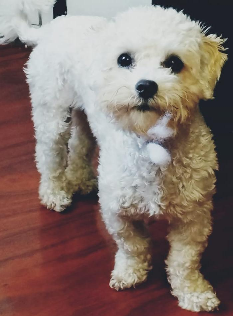

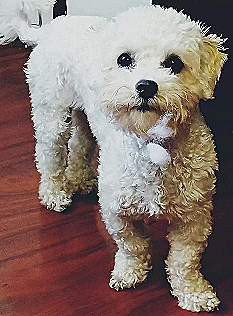

In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


#Carga de imagen
image_cookey = cv2.imread('cookie.jpg', cv2.IMREAD_UNCHANGED)

# Calcular las nuevas dimensiones
nuevo_ancho = int(image_cookey.shape[1] * (1/3))
nuevo_alto = int(image_cookey.shape[0] * (1/3))

# Redimensionar la imagen
image = cv2.resize(image_cookey, (nuevo_ancho, nuevo_alto))

#Definición del kernel de convolusión
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

#Aplicación de la convolución
convolved_image = cv2.filter2D(image, -1, kernel)

#Impresión de resultados
cv2_imshow(image)
cv2_imshow(convolved_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

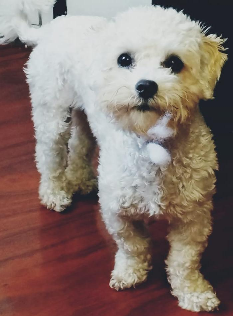

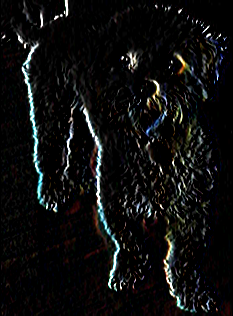

In [21]:
#Definición del kernel de convolusión
kernel2 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

#Aplicación de la convolución
convolved_image2 = cv2.filter2D(image, -1, kernel2)

#Impresión de resultados
cv2_imshow(image)
cv2_imshow(convolved_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

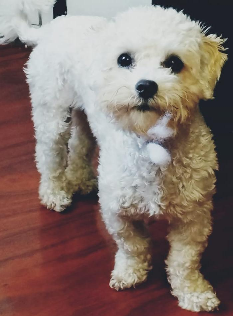

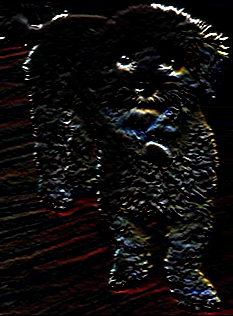

In [22]:
#Definición del kernel de convolusión
kernel3 = np.array([[-1,-2,-1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

#Aplicación de la convolución
convolved_image3 = cv2.filter2D(image, -1, kernel3)

#Impresión de resultados
cv2_imshow(image)
cv2_imshow(convolved_image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

##Redes Neuronal Convolucional aplicadas en MNIST reconocimiento de dígitos manuscritos##

In [24]:
import keras
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
#Carga de datos MNIST
minst = keras.datasets.mnist

#División de prueba y entrenamiento
(x_train, y_train), (x_test, y_test) = minst.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [26]:
#Normalización de los valores de los píxeles del train y prueba
x_train = x_train / 255
x_test = x_test / 255

In [28]:
#Construcción del modelo de clasificación
model = keras.models.Sequential([
    #Adición de convoluciones y max pooling
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D((2, 2)),
    #Agregar las mismas capas anteriores
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [29]:
#Compilación del modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1509 - accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0491 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0210 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 52s 28m

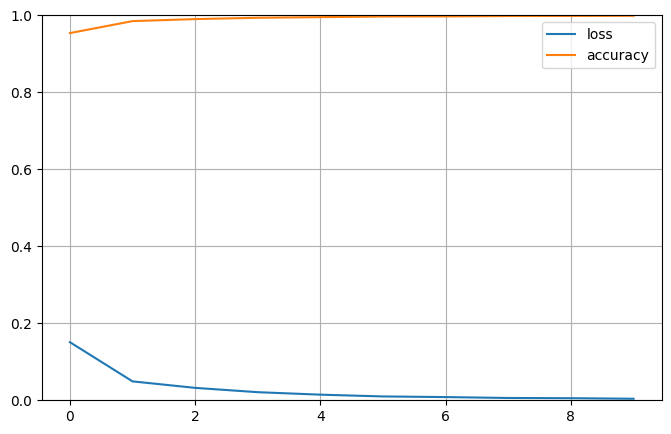

In [30]:
#Entrenamiento
history = model.fit(x_train, y_train, epochs=10)

#Gráfico del historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
#Evalución del modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(x_train, y_train)
print("Loss training:", loss)
print("Accuracy training:", accuracy)

#Evaluación con datos no vistos
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss test:", loss)
print("Accuracy test:", accuracy)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0091 - accuracy: 0.9969
Loss training: 0.009097049944102764
Accuracy training: 0.996916651725769
313/313 [==============================] - 2s 6ms/step - loss: 0.0715 - accuracy: 0.9852
Loss test: 0.07153703272342682
Accuracy test: 0.9851999878883362


In [32]:
#Predicción
index = 1
print(f'Label: {y_test[index]}')
classification = model.predict(x_test[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 98ms/step
Classification:
 [[9.5288674e-15]
 [1.1487840e-08]
 [1.0000000e+00]
 [7.5079428e-21]
 [1.5712585e-24]
 [6.8170654e-24]
 [9.8722723e-15]
 [2.0360560e-21]
 [4.1463196e-17]
 [9.7015651e-19]]


In [33]:
print(y_test[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [34]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 25

print(y_test[FIRST_IMAGE])
print(y_test[SECOND_IMAGE])
print(y_test[THIRD_IMAGE])

0
0
0


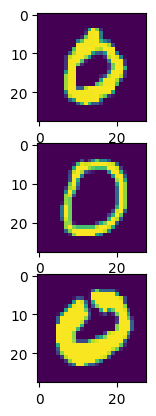

In [35]:
f, axarr = plt.subplots(3, 1)
axarr[0].imshow(x_test[FIRST_IMAGE].reshape(28, 28))
axarr[1].imshow(x_test[SECOND_IMAGE].reshape(28, 28))
axarr[2].imshow(x_test[THIRD_IMAGE].reshape(28, 28))

In [37]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 21ms/step


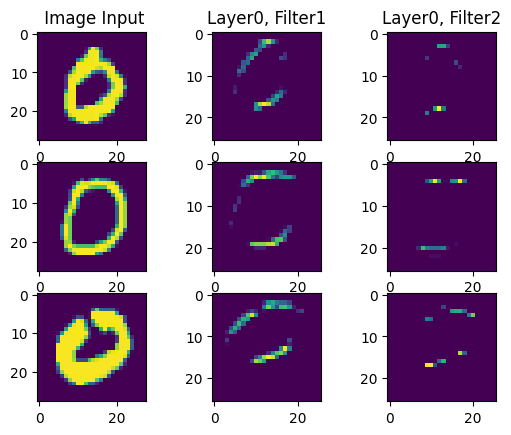

In [44]:
f, axarr = plt.subplots(3, 3)

axarr[0, 0].set_title(" Image Input")
axarr[0, 0].imshow(x_test[FIRST_IMAGE].reshape(28, 28))
f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer" + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer" + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(x_test[SECOND_IMAGE].reshape(28, 28))
f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(x_test[THIRD_IMAGE].reshape(28, 28))
f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])

In [45]:
FIRST_IMAGE = 2
SECOND_IMAGE = 5
THIRD_IMAGE = 14

print(y_test[FIRST_IMAGE])
print(y_test[SECOND_IMAGE])
print(y_test[THIRD_IMAGE])

1
1
1


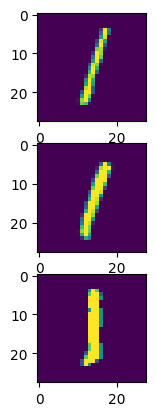

In [46]:
f, axarr = plt.subplots(3, 1)
axarr[0].imshow(x_test[FIRST_IMAGE].reshape(28, 28))
axarr[1].imshow(x_test[SECOND_IMAGE].reshape(28, 28))
axarr[2].imshow(x_test[THIRD_IMAGE].reshape(28, 28))

In [47]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 20ms/step


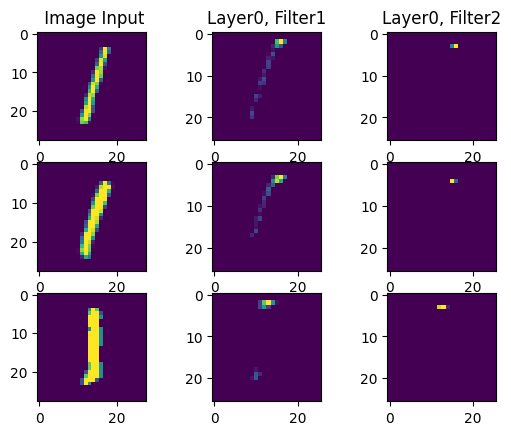

In [48]:
f, axarr = plt.subplots(3, 3)

axarr[0, 0].set_title(" Image Input")
axarr[0, 0].imshow(x_test[FIRST_IMAGE].reshape(28, 28))
f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer" + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer" + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(x_test[SECOND_IMAGE].reshape(28, 28))
f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(x_test[THIRD_IMAGE].reshape(28, 28))
f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])